In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [187]:
cancer = pd.read_csv(r"C:\Users\HP\Desktop\datasets\breast_cancer.csv")

In [188]:
cancer.head(10)

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
5,1017122,8.0,10.0,10,8,7,10,9.0,7.0,1,malignant,Dr. Smith
6,1018099,1.0,NaN,1,1,2,10,3.0,1.0,1,benign,Dr. Doe
7,1018561,2.0,1.0,2,1,2,1,3.0,1.0,1,benign,Dr. Smith
8,1033078,2.0,1.0,1,1,2,1,1.0,1.0,5,benign,Dr. Smith
9,1033078,4.0,2.0,1,1,2,1,2.0,1.0,1,benign,Dr. Doe


In [189]:
cancer.shape

(699, 12)

In [190]:
cancer.describe()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,normal_nucleoli,mitoses
count,6.990000e+02,698.000000,698.000000,699.000000,699.000000,699.000000,695.000000,698.000000,699.000000
mean,1.071704e+06,4.416905,3.137536,3.207439,2.793991,3.216023,3.447482,2.868195,1.589413
std,6.170957e+05,2.817673,3.052575,2.971913,2.843163,2.214300,2.441191,3.055647,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,3.500000,4.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [191]:
cancer.isnull().sum()

patient_id               0
clump_thickness          1
cell_size_uniformity     1
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              2
bland_chromatin          4
normal_nucleoli          1
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [192]:
cancer.dtypes

patient_id                 int64
clump_thickness          float64
cell_size_uniformity     float64
cell_shape_uniformity      int64
marginal_adhesion          int64
single_ep_cell_size        int64
bare_nuclei               object
bland_chromatin          float64
normal_nucleoli          float64
mitoses                    int64
class                     object
doctor_name               object
dtype: object

In [193]:
cancer['clump_thickness'].mean()

4.416905444126074

In [194]:
cancer['clump_thickness'].fillna(cancer['clump_thickness'].mean(), inplace = True)

In [195]:
cancer['cell_size_uniformity'].fillna(cancer['cell_size_uniformity'].mean(), inplace = True)

In [196]:
cancer['bare_nuclei'].mode()

0    1
dtype: object

In [197]:
cancer['normal_nucleoli'].mode()

0    1.0
dtype: float64

In [198]:
cancer['bare_nuclei'].fillna('1', inplace = True)

In [199]:
cancer['bland_chromatin'].fillna(cancer['bland_chromatin'].mean(), inplace = True)

In [200]:
cancer['normal_nucleoli'].fillna('1.0', inplace = True)

In [201]:
cancer.isnull().sum()

patient_id               0
clump_thickness          0
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [202]:
cancer.drop(['doctor_name', 'patient_id', 'normal_nucleoli', 'bare_nuclei'], axis = 1, inplace = True)

In [203]:
cancer['class'] = cancer['class'].map({'benign':0, 'malignant':1})

In [204]:
cancer.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,mitoses,class
0,5.0,1.0,1,1,2,3.0,1,0
1,5.0,4.0,4,5,7,3.0,1,0
2,3.0,1.0,1,1,2,3.0,1,0
3,6.0,8.0,8,1,3,3.0,1,0
4,4.0,1.0,1,3,2,3.0,1,0


In [205]:
cancer['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

In [206]:
cancer.shape

(699, 8)

In [207]:
cancer.describe()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.416905,3.137536,3.207439,2.793991,3.216023,3.447482,1.589413,0.344778
std,2.815654,3.050388,2.971913,2.843163,2.214300,2.434186,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,3.500000,4.000000,5.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [229]:
cancer[['clump_thickness', 'class']].groupby(['clump_thickness'], as_index=False).mean()

,clump_thickness,class
0,1.000000,0.020690
1,2.000000,0.080000
2,3.000000,0.111111
3,4.000000,0.150000
4,4.416905,1.000000
5,5.000000,0.341085
6,6.000000,0.529412
7,7.000000,0.956522
8,8.000000,0.913043
9,9.000000,1.000000


In [230]:
cancer[['cell_size_uniformity', 'class']].groupby(['cell_size_uniformity'], as_index=False).mean()

,cell_size_uniformity,class
0,1.000000,0.010444
1,2.000000,0.177778
2,3.000000,0.480769
3,3.137536,0.000000
4,4.000000,0.775000
5,5.000000,1.000000
6,6.000000,0.925926
7,7.000000,0.947368
8,8.000000,0.965517
9,9.000000,0.833333


In [231]:
cancer[['cell_shape_uniformity', 'class']].groupby(['cell_shape_uniformity'], as_index=False).mean()

,cell_shape_uniformity,class
0,1,0.005666
1,2,0.118644
2,3,0.410714
3,4,0.704545
4,5,0.911765
5,6,0.900000
6,7,0.933333
7,8,0.964286
8,9,1.000000
9,10,1.000000


In [232]:
cancer[['marginal_adhesion', 'class']].groupby(['marginal_adhesion'], as_index=False).mean()

,marginal_adhesion,class
0,1,0.080882
1,2,0.362069
2,3,0.465517
3,4,0.848485
4,5,0.826087
5,6,0.818182
6,7,1.000000
7,8,1.000000
8,9,0.800000
9,10,0.981481


In [233]:
cancer[['single_ep_cell_size', 'class']].groupby(['single_ep_cell_size'], as_index=False).mean()

,single_ep_cell_size,class
0,1,0.021277
1,2,0.059585
2,3,0.597222
3,4,0.854167
4,5,0.871795
5,6,0.951220
6,7,0.750000
7,8,0.904762
8,9,1.000000
9,10,0.967742


In [234]:
cancer[['bland_chromatin', 'class']].groupby(['bland_chromatin'], as_index=False).mean()

,bland_chromatin,class
0,1.000000,0.013333
1,2.000000,0.042424
2,3.000000,0.213415
3,3.447482,0.250000
4,4.000000,0.800000
5,5.000000,0.882353
6,6.000000,0.900000
7,7.000000,0.904110
8,8.000000,1.000000
9,9.000000,1.000000


In [235]:
cancer[['mitoses', 'class']].groupby(['mitoses'], as_index=False).mean()

,mitoses,class
0,1,0.231434
1,2,0.771429
2,3,0.939394
3,4,1.000000
4,5,0.833333
5,6,1.000000
6,7,0.888889
7,8,0.875000
8,10,1.000000


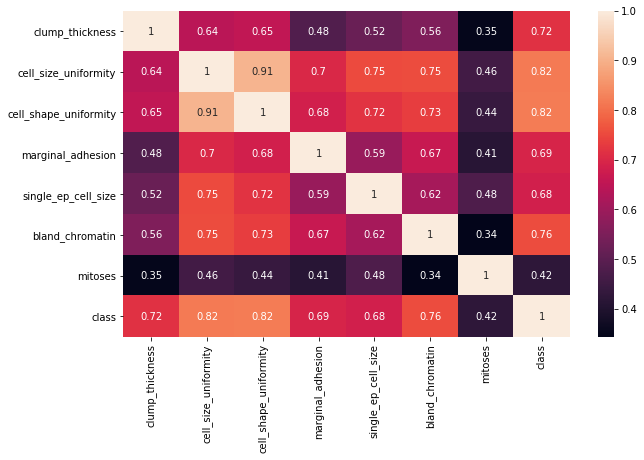

In [228]:
fig, corr = plt.subplots(figsize=(10, 6))
sb.heatmap(cancer.corr(), annot=True)
plt.show()

In [236]:
cancer.drop(['cell_shape_uniformity'], axis=1, inplace=True)

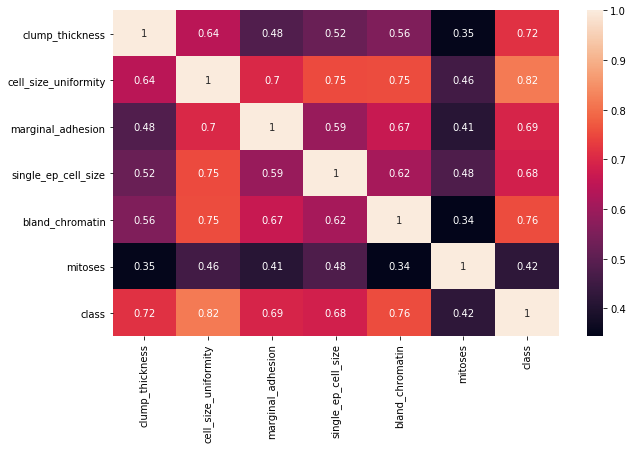

In [255]:
fig, corr = plt.subplots(figsize=(10, 6))
sb.heatmap(cancer.corr(), annot=True)
plt.show()

In [256]:
X = cancer.iloc[:, :6]
Y = cancer.iloc[:, 6]

In [257]:
X

,clump_thickness,cell_size_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,mitoses
0,5.0,1.0,1,2,3.0,1
1,5.0,4.0,5,7,3.0,1
2,3.0,1.0,1,2,3.0,1
3,6.0,8.0,1,3,3.0,1
4,4.0,1.0,3,2,3.0,1
...,...,...,...,...,...,...
694,3.0,1.0,1,3,1.0,1
695,2.0,1.0,1,2,1.0,1
696,5.0,10.0,3,7,8.0,2
697,4.0,8.0,4,3,10.0,1


In [258]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

In [259]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.1, random_state=0)

In [260]:
log = LogisticRegression()

In [261]:
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [262]:
y_pred = log.predict(x_test)

In [263]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1], dtype=int64)

In [264]:
y_test

476    0
531    0
40     0
432    0
14     1
      ..
549    1
231    1
417    0
454    0
604    1
Name: class, Length: 70, dtype: int64

In [265]:
accuracy_score(y_pred, y_test)

0.9571428571428572

In [266]:
log.score(x_train, y_train)

0.9554848966613673

In [267]:
confusion_matrix(y_pred, y_test)

array([[42,  1],
       [ 2, 25]], dtype=int64)

In [268]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.96      0.93      0.94        27

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.95        70
weighted avg       0.96      0.96      0.96        70

